In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('credit card.xlsx')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.shape

(30000, 25)

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [7]:
df = df.rename(columns={'default.payment.next.month' : 'payment'})

In [8]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
x = df.drop(['ID', 'payment'],axis=1)

In [10]:
y = df['payment']

In [11]:
y.value_counts()

payment
0    23364
1     6636
Name: count, dtype: int64

# Extra Tree Classifier

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

In [13]:
extra = ExtraTreesClassifier()

In [14]:
extra.fit(x,y)

ExtraTreesClassifier()

In [15]:
extra.feature_importances_

array([0.0656912 , 0.01026768, 0.03304242, 0.02163409, 0.06646886,
       0.09488819, 0.04886515, 0.03621956, 0.02884097, 0.03103147,
       0.02913302, 0.05042048, 0.04669388, 0.04529886, 0.04438919,
       0.04372686, 0.04425791, 0.04451517, 0.04221096, 0.04211532,
       0.04124278, 0.04270763, 0.04633835])

In [16]:
feature_importance = extra.feature_importances_

In [17]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])

In [18]:
imp.head()

,Gain_Score
0,0.065691
1,0.010268
2,0.033042
3,0.021634
4,0.066469


In [19]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [20]:
cols = pd.DataFrame(x.columns, columns=['Feature Name'])

In [21]:
cols.head()

,Feature Name
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE


In [22]:
gains = pd.concat([cols,imp], axis=1)

In [23]:
gains.head()

,Feature Name,Gain_Score
0,LIMIT_BAL,0.065691
1,SEX,0.010268
2,EDUCATION,0.033042
3,MARRIAGE,0.021634
4,AGE,0.066469


In [24]:
gains.nlargest(15,'Gain_Score')

,Feature Name,Gain_Score
5,PAY_0,0.094888
4,AGE,0.066469
0,LIMIT_BAL,0.065691
11,BILL_AMT1,0.050420
6,PAY_2,0.048865
12,BILL_AMT2,0.046694
22,PAY_AMT6,0.046338
13,BILL_AMT3,0.045299
17,PAY_AMT1,0.044515
14,BILL_AMT4,0.044389


<Axes: >

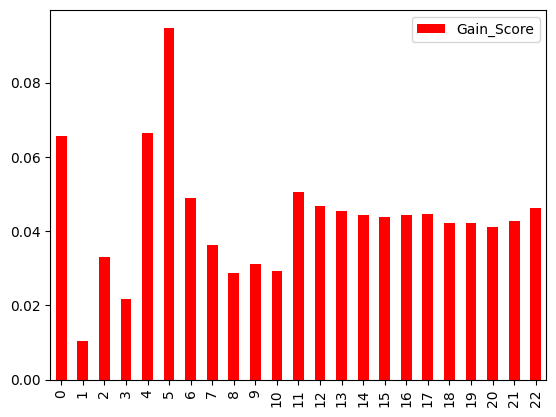

In [25]:
gains.plot(kind='bar',color='red') #horizontal

<Axes: >

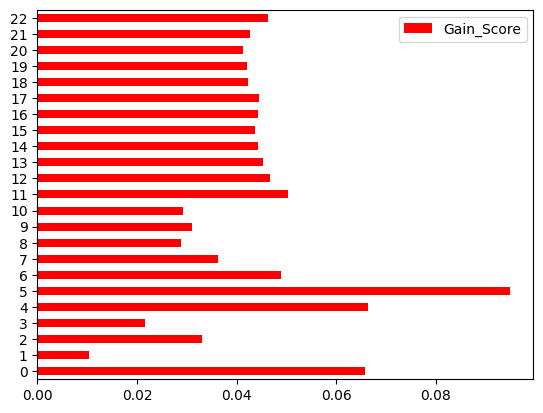

In [26]:
gains.plot(kind='barh',color='red')

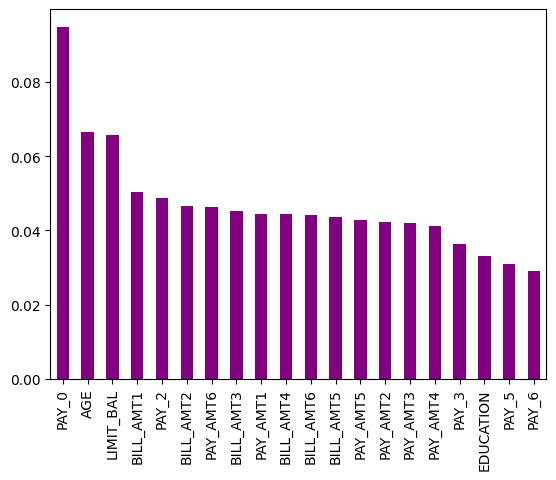

<Figure size 1000x600 with 0 Axes>

In [27]:
data = pd.Series(extra.feature_importances_, index=x.columns)
data.nlargest(20).plot(kind='bar', color='purple')
plt.figure(figsize=(10, 6))

plt.show()

# Select K Best

In [28]:
df = pd.read_excel('credit card.xlsx')
df = df.rename(columns={'default.payment.next.month' : 'payment'})
x = df.drop(['ID', 'payment'],axis=1)
y = df['payment']

In [29]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [30]:
from sklearn.feature_selection import SelectKBest, f_classif

In [31]:
model2 = SelectKBest(score_func=f_classif)

In [32]:
feature_score = model2.fit(x,y)

In [33]:
feature_score.scores_

array([7.24068539e+02, 4.79788543e+01, 2.35471118e+01, 1.77812714e+01,
       5.78855582e+00, 3.53771497e+03, 2.23916914e+03, 1.75746644e+03,
       1.47684597e+03, 1.30459118e+03, 1.08540249e+03, 1.15805315e+01,
       6.04423789e+00, 5.94438771e+00, 3.09474518e+00, 1.37108740e+00,
       8.65820292e-01, 1.60403810e+02, 1.03291524e+02, 9.52180109e+01,
       9.71880005e+01, 9.14298008e+01, 8.50890453e+01])

In [34]:
cols = pd.DataFrame(feature_score.scores_, columns=['Feature Score'])
cols

,Feature Score
0,724.068539
1,47.978854
2,23.547112
3,17.781271
4,5.788556
5,3537.714970
6,2239.169136
7,1757.466444
8,1476.845967
9,1304.591176


In [35]:
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [36]:
cols2 = pd.DataFrame(x.columns, columns=['Feature Name'])
cols2.head()

,Feature Name
0,LIMIT_BAL
1,SEX
2,EDUCATION
3,MARRIAGE
4,AGE


In [37]:
scores = pd.concat((cols, cols2), axis=1)

In [38]:
newx = scores.nlargest(15,'Feature Score')

In [39]:
newx.head()

,Feature Score,Feature Name
5,3537.714970,PAY_0
6,2239.169136,PAY_2
7,1757.466444,PAY_3
8,1476.845967,PAY_4
9,1304.591176,PAY_5


# PCA

In [40]:
df = pd.read_excel('credit card.xlsx')
df = df.rename(columns={'default.payment.next.month' : 'payment'})
x = df.drop(['ID', 'payment'],axis=1)
y = df['payment']

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
mmx = MinMaxScaler()

In [43]:
scaled_x = mmx.fit_transform(x)
scaled_x

array([[0.01010101, 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 1.        , 0.33333333, ..., 0.00161031, 0.        ,
        0.00378311],
       [0.08080808, 1.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00945777],
       ...,
       [0.02020202, 0.        , 0.33333333, ..., 0.00676329, 0.00468901,
        0.00586382],
       [0.07070707, 0.        , 0.5       , ..., 0.00310145, 0.12417444,
        0.00341236],
       [0.04040404, 0.        , 0.33333333, ..., 0.00161031, 0.00234451,
        0.00189155]])

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components = 3)

In [46]:
x_pca = pca.fit_transform(scaled_x)
x_pca

array([[-0.40423245, -0.00800476, -0.00259673],
       [-0.39188881,  0.209224  , -0.19698758],
       [-0.39264215,  0.08409527, -0.12656656],
       ...,
       [ 0.62351265,  0.33728837, -0.08489182],
       [ 0.60374479, -0.01953156,  0.21421096],
       [ 0.60917214,  0.0099741 ,  0.23321988]])

In [47]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'payment'],
      dtype='object')

In [48]:
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca

NameError: name 'X_pca' is not defined